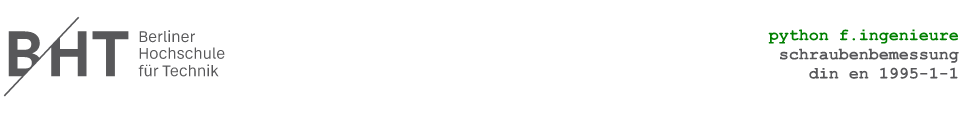

# Anwendungsbeispiel 2: Schraubenbemessung
*DIN EN 1995-1-1 Abs. 8 & ETA-11/0190*

## Anwendung

Im Folgenden werden für den eingegebenen Schraubendurchmesser die Axial- und Schertragfähigkeit für alle verfügbaren Längen des Herstellers Würth berechnet. Die Ergebnisse werden in Tabellen und Diagrammen dargestellt und hinsichtlich der eingegebenen Abmessungen und Einwirkungen farblich abgesetzt.

**Würth ASSY plus VG als Senkkopf-Ausführung**

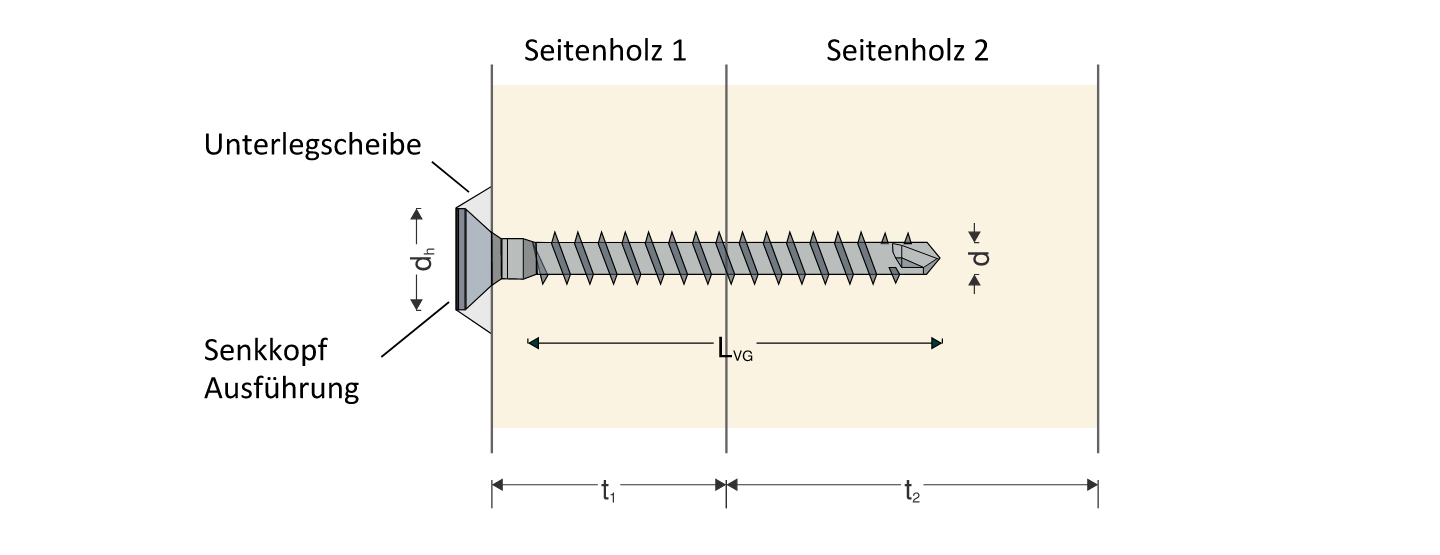

In [41]:
#__________Eingabewerte__________

##Verbindungsmittel
Hersteller = 'Würth'
d = 8 #mm
t_Blech = 0 #mm

##Holz
t_1 = 120 #mm
t_2 = 500 #mm
rho_k = 350 #kg/m3
alpha = 90 #Grad

##Einwirkung
F_td = 5 #kN
F_vd = 2 #kN

In [42]:
#__________Bibliotheken__________

from IPython.display import Markdown
from math import pi, sqrt
import plotly.graph_objects as go
import plotly.express as px
%run ../../00_Jupyter_Notebooks/4.2_Anwendungsbeispiel_2_Schraubenbemessung_Funktion.ipynb

#__________Vorbereitungssschritte__________

##Allgmemein
###Listen
L_d = [6, 8, 10, 12]
L_Längen = [[120,140,160,180,200,220,240,260], 
       [120,140,160,180,200,220,240,260,280,300,330,380,430,480,530,580], 
       [120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,430,480,530,580,600,650,700,750,800], 
       [120,140,160,180,200,220,240,260,280,300,380,480,600]]

index = L_d.index(d)
L_L = L_Längen[index]
L_axial = []
L_scher = []
L_anmerk = []

###Farben
grey = '#bfced8'
dark_grey = 'lightslategrey'
red = '#ff4b4b'
light_grey = '#f0f2f6'

##Tabelle
L_t_fill2 = []
L_t_fill3 = []   

##Diagramm
L_colors_bar = []

#__________Berechnung der Tragfähigkeiten__________

for n,L in enumerate(L_L):
    F_axRk, F_vRk, nw = ec5_87_tragfähigkeit_vg(Hersteller, d, L, t_1, t_2, t_Blech, rho_k, alpha)
        
    L_axial.append(F_axRk)
    L_scher.append(F_vRk)

if nw[0] == 'success':
    ooo=1
else:
    display(Markdown("""<div class="alert alert-block alert-danger"><b>"""+str(nw)+"""</div>"""))

    
#__________Erzeugung der Tabelle__________

##Dictionaries
dict_header={'values':[('L','[mm]'),  ('F_axRk','[kN]'), ('F_vRk','[kN]')],
            'align':'center','font':{'size':15, 'color':'black'}, 'fill_color':grey, 'line_color':'white'}

dict_cells={'values':[L_L,  L_axial, L_scher],
           'height':30,'font':{'size':15, 'color':'black'}, 'fill_color':[light_grey, L_t_fill2, L_t_fill3]}

##Schleife für Farbgebung
for i in range(len(L_L)):
    if L_axial[i] < F_td:
        dict_cells['fill_color'][1].append(light_grey)
    else: 
        dict_cells['fill_color'][1].append(red)        
        
    if L_scher[i] < F_vd:
        dict_cells['fill_color'][2].append(light_grey)
    else: 
        dict_cells['fill_color'][2].append(dark_grey)   
        
##Initiieren eines Figure-Objektes
tabelle = go.Figure()

##Erzeugen der Tabelle
tabelle.add_traces([go.Table(header=dict_header, cells=dict_cells)])

#Anzeigen der Tabelle
tabelle.show()

#__________Erzeugung der Diagramme__________

##Erstellen eines Dictionaries
dict_d6 = {'L': L_L, 'F_axRk': L_axial, 'F_vRk': L_scher}

##Vorbereitungsschritte
L_axial_scher = [L_axial, L_scher]
L_einwirkung = [F_td, F_vd]

L_title = ["Axialtragfähigkeit", "Schertragfähigkeit"]
L_title_axis = ["Axialtragfähigkeit [kN]", "Schertragfähigkeit [kN]"]
L_colors_bar = [[],[]]
L_colors = [red, dark_grey]

#Schleife
for i in range(2):
    
    #Hinzufügen eines Diagramms
    fig =  px.bar(dict_d6, x='L', y=L_axial_scher[i], text_auto=True, title=L_title[i], height=600, width=1000)

    #Schleife für Farbgebung
    for j in range(len(L_L)):

        if L_axial_scher[i][j] < L_einwirkung[i]:
            L_colors_bar[i].append(grey)
        else: 
            L_colors_bar[i].append(L_colors[i])       

    #Hinzufügen einer Axenbeschriftung
    fig.update_traces(marker_color=L_colors_bar[i])

    #Hinzufügen einer Axenbeschriftung
    fig.update_yaxes(title_text=L_title_axis[i])
    fig.update_xaxes(showticklabels=True, tickangle=90, title_text="Längen [mm]", type='linear')

    #Anzeigen des Diagramms
    fig.show()

___
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022